### Combined Models on Filtered Twitter Sentiment Data

#### ML Models Trained on Dataset Labels

##### Importing Necessary Packages and Loading Dataset

In [1]:
import pandas as pd
import nltk 

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('twitter_sentiment_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [3]:
df.rename(columns={'sentiment': "label", 'message':'text'}, inplace=True)
df = df.drop(columns=['tweetid'])
df.head()


,label,text
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [4]:
df['label'].value_counts()

label
 1    22962
 2     9276
 0     7715
-1     3990
Name: count, dtype: int64

In [5]:
# The dataset uses the labels -1: Anti, 0: Neutral, 1: Pro, and 2: News.
# We need to remove any entries under the label 2 as factual news does not fit with VADER pretrained model. 

df = df.drop(df[df['label'] ==  2].index)

In [6]:
# We succesfully renamed and removed News from the sentiment column, but we need to drop the entries that go with News since we only removed the sentiment values, not the tweets.
df.info()
# We do this using dropna()
df.dropna(subset=['label'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 34667 entries, 0 to 43942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   34667 non-null  int64 
 1   text    34667 non-null  object
dtypes: int64(1), object(1)
memory usage: 812.5+ KB


In [7]:
df.info()
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34667 entries, 0 to 43942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   34667 non-null  int64 
 1   text    34667 non-null  object
dtypes: int64(1), object(1)
memory usage: 812.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 34667 entries, 0 to 43942
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   34667 non-null  int64 
 1   text    34667 non-null  string
dtypes: int64(1), string(1)
memory usage: 812.5 KB


##### Filtering Data by Relevant Keywords

In [8]:
nltk.download('punkt')  # Download the punkt tokenizer if not already downloaded

df['tokens'] = df['text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tessanderson/nltk_data...


[nltk_data]   Package punkt is already up-to-date!


In [9]:
keywords = ["sustainability", "environmental", "conservation", "recycling", "sustainable",
                         "responsibility", "green", "eco-friendly", "renewable", "carbon", "climate", "ecosystem",
                         "planet", "biodiversity", "energy", "water", "pollution", "reduction", "renewability", 
                         "ecological", "renewable", "greenhouse", "clean", "solar", "wind", "earth", "sustainable", 
                         "planet", "ecology", "ocean", "forest", "organic", "earth-friendly", "bio", "ethics", 
                         "conservationist", "sustain", "renew", "ethical", "greenery", "saver", "sustainable", 
                         "conservator", "recycler", "biodegradable", "natural", "greenery", "environment", 
                         "saver", "earth-saving", "sustainability", "green-living", "clean", "responsible", 
                         "preservation", "regeneration", "ecosystem", "safeguarding"]
filtered_df = df[df['tokens'].apply(lambda tokens: any(keyword in tokens for keyword in keywords))]

In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24847 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   24847 non-null  int64 
 1   text    24847 non-null  string
 2   tokens  24847 non-null  object
dtypes: int64(1), object(1), string(1)
memory usage: 776.5+ KB


In [11]:
filtered_df.head()

,label,text,tokens
0,-1,@tiniebeany climate change is an interesting h...,"[@, tiniebeany, climate, change, is, an, inter..."
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"[RT, @, NatGeoChannel, :, Watch, #, BeforeTheF..."
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,"[Fabulous, !, Leonardo, #, DiCaprio, 's, film,..."
3,1,RT @Mick_Fanning: Just watched this amazing do...,"[RT, @, Mick_Fanning, :, Just, watched, this, ..."
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,"[RT, @, AmericanIndian8, :, Leonardo, DiCaprio..."


##### Machine Learning Models trained on Dataset Labels

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = filtered_df.text.values
y = filtered_df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [14]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [15]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Dataset_acc_list = []
Dataset_auc_list = []
Dataset_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Dataset_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Dataset_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

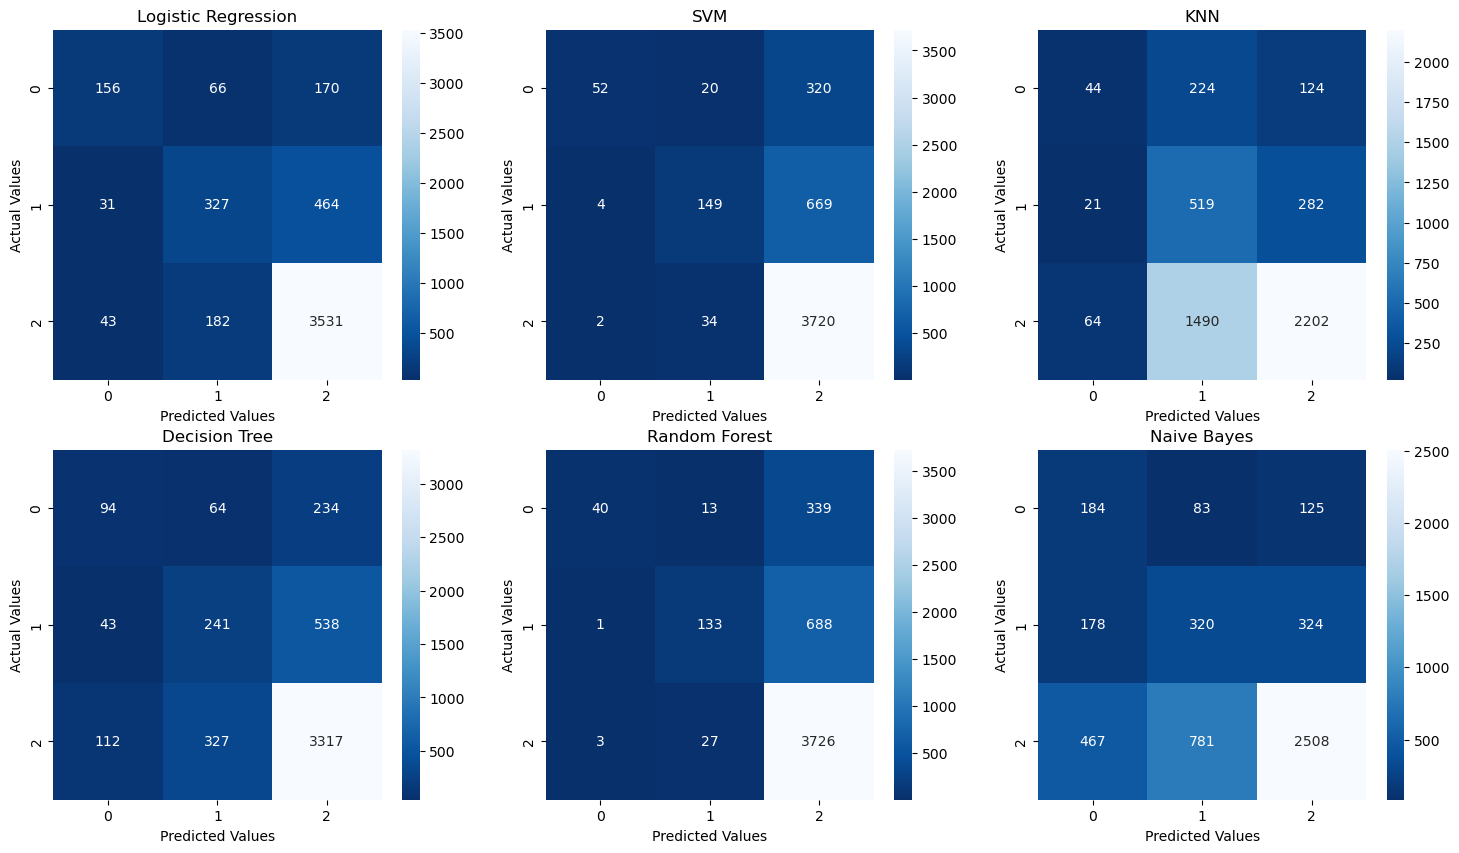

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Dataset_cm_list)):
    cm = Dataset_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [17]:
data_labels_results = pd.DataFrame({'Model':model_list, 'Accuracy':Dataset_acc_list})
data_labels_results 

,Model,Accuracy
0,Logistic Regression,0.807646
1,SVM,0.788934
2,KNN,0.556338
3,Decision Tree,0.734809
4,Random Forest,0.784507
5,Naive Bayes,0.606036


#### Training ML Models on VADER Predictions

##### Setting up VADER Predictions

In [18]:
def format_output(output_dict):
    sentiment=False
    if(output_dict['compound']>=0.05):
        sentiment=1
    elif(output_dict['compound']<=-0.05):
        sentiment=-1
    else:
        sentiment=0
    return sentiment
def predict_sentiment(text):
    output_dict = sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

# running the predictions
filtered_df['vader_prediction']=filtered_df['text'].apply(predict_sentiment)
filtered_df.sample(5)

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_82357/4111981508.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['vader_prediction']=filtered_df['text'].apply(predict_sentiment)


,label,text,tokens,vader_prediction
18008,-1,@MMFlint Good. Man-made climate change is hors...,"[@, MMFlint, Good, ., Man-made, climate, chang...",1
36401,1,How is climate change transforming Arctic rive...,"[How, is, climate, change, transforming, Arcti...",0
32122,0,RT @amconmag: 'Figure out where one stands on ...,"[RT, @, amconmag, :, 'Figure, out, where, one,...",0
42606,1,RT @SenSanders: Climate change is the greatest...,"[RT, @, SenSanders, :, Climate, change, is, th...",0
2922,1,RT @cuynchips: Heedless of YAG to not even men...,"[RT, @, cuynchips, :, Heedless, of, YAG, to, n...",1


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.vader_prediction.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [21]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Vader_acc_list = []
Vader_auc_list = []
Vader_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #pr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Vader_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Vader_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

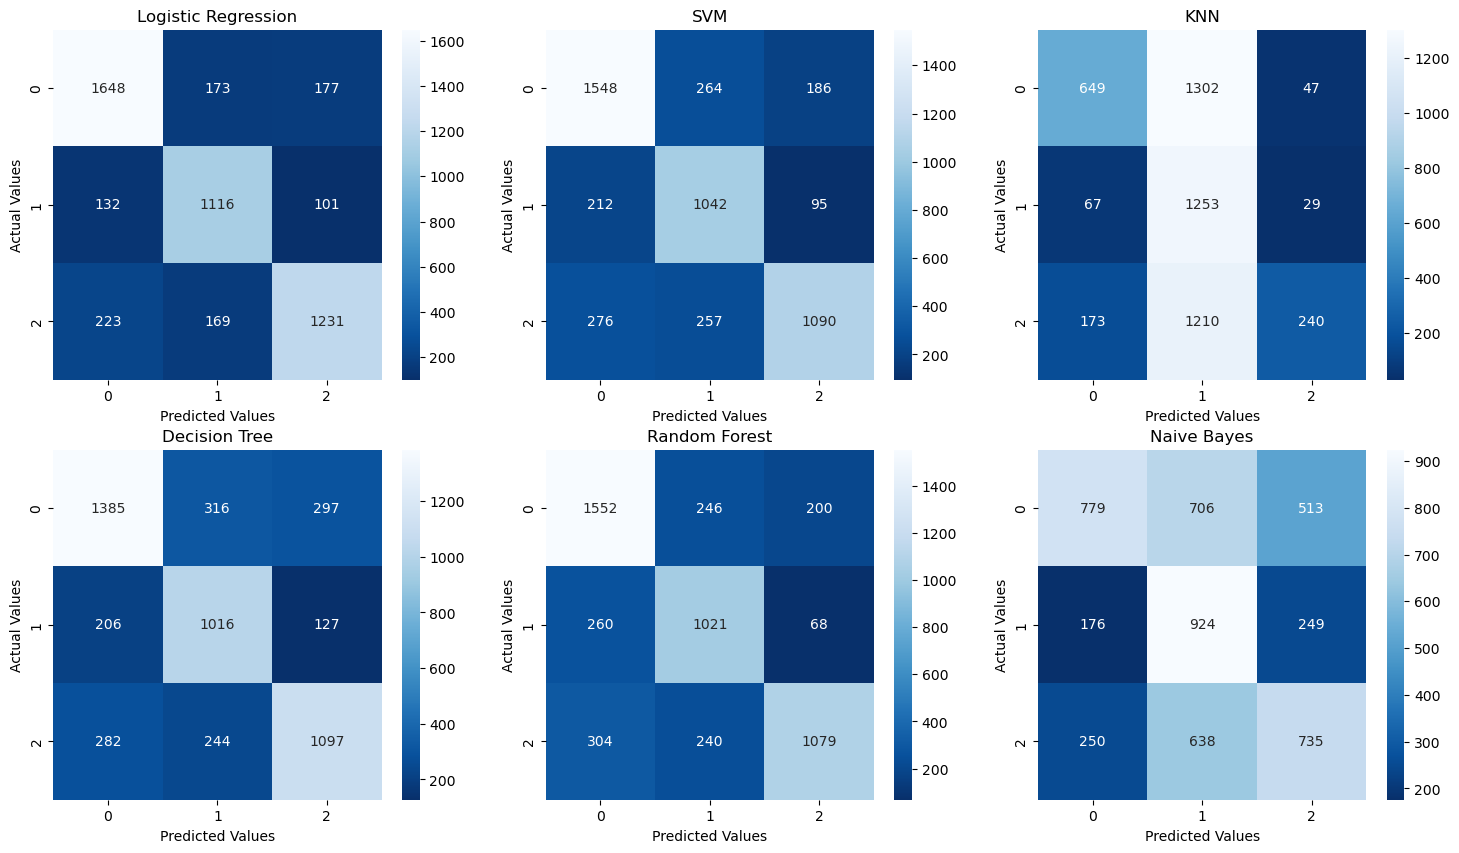

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Vader_cm_list)):
    cm = Vader_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [24]:
VaderML_results = pd.DataFrame({'Model':model_list, 'Accuracy':Vader_acc_list})
VaderML_results

,Model,Accuracy
0,Logistic Regression,0.803823
1,SVM,0.740443
2,KNN,0.430986
3,Decision Tree,0.703823
4,Random Forest,0.734809
5,Naive Bayes,0.490543


#### Textblob & 6 Machine Learning Models

##### Setting up TextBlob Predictions

In [25]:
from textblob import TextBlob

In [26]:
def sentiment_analysis(text):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 text['TextBlob_Subjectivity'] = text['text'].apply(getSubjectivity)
 text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1
 text ['TextBlob_Analysis'] = text  ['TextBlob_Polarity'].apply(getAnalysis )
 return text

In [27]:
filtered_df = sentiment_analysis(filtered_df)

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_82357/2437952672.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['TextBlob_Subjectivity'] = text['text'].apply(getSubjectivity)
/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_82357/2437952672.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_82357/2437952672.py:19: SettingWithCopyWarning: 
A value is trying

In [28]:
filtered_df.head()

,label,text,tokens,vader_prediction,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,-1,@tiniebeany climate change is an interesting h...,"[@, tiniebeany, climate, change, is, an, inter...",1,0.250000,0.250000,1
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"[RT, @, NatGeoChannel, :, Watch, #, BeforeTheF...",0,0.535714,0.285714,1
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,"[Fabulous, !, Leonardo, #, DiCaprio, 's, film,...",1,1.000000,0.750000,1
3,1,RT @Mick_Fanning: Just watched this amazing do...,"[RT, @, Mick_Fanning, :, Just, watched, this, ...",1,0.450000,0.300000,1
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,"[RT, @, AmericanIndian8, :, Leonardo, DiCaprio...",1,0.400000,0.200000,1


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.TextBlob_Analysis.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [31]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
tb_acc_list = []
tb_auc_list = []
tb_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #tb_auc_list.append(round(metrics.auc(fpr, tpr),2))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #tb_auc_list.append(round(metrics.auc(fpr, tpr),2))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

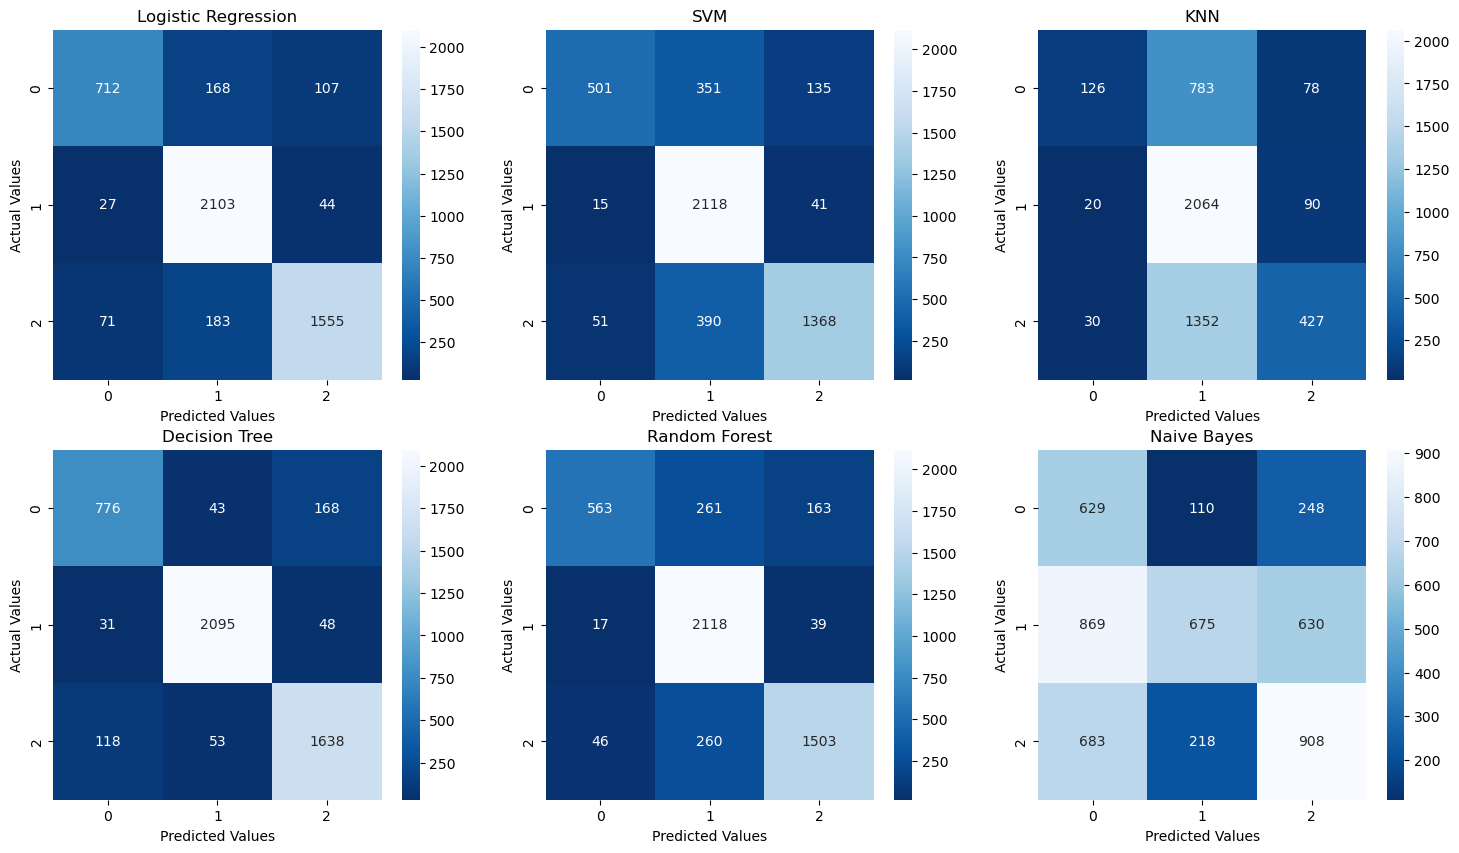

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(tb_cm_list)):
    cm = tb_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [34]:
TBML_results = pd.DataFrame({'Model':model_list, 'Accuracy':tb_acc_list})
TBML_results

,Model,Accuracy
0,Logistic Regression,0.879276
1,SVM,0.802213
2,KNN,0.526559
3,Decision Tree,0.907243
4,Random Forest,0.841851
5,Naive Bayes,0.445070


#### Flair & 6 Machine Learning Models

In [35]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import re

sia = TextClassifier.load('en-sentiment')

In [36]:
def sentiment_Flair(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return 1
    else:
        return 0

In [37]:
filtered_df['Flair_Sentiment'] = filtered_df['text'].apply(lambda x: sentiment_Flair(x))

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_82357/370663139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Flair_Sentiment'] = filtered_df['text'].apply(lambda x: sentiment_Flair(x))


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.Flair_Sentiment.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [40]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [41]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
f_acc_list = []
f_auc_list = []
f_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #f_auc_list.append(round(metrics.auc(fpr, tpr),2))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #f_auc_list.append(round(metrics.auc(fpr, tpr),2))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

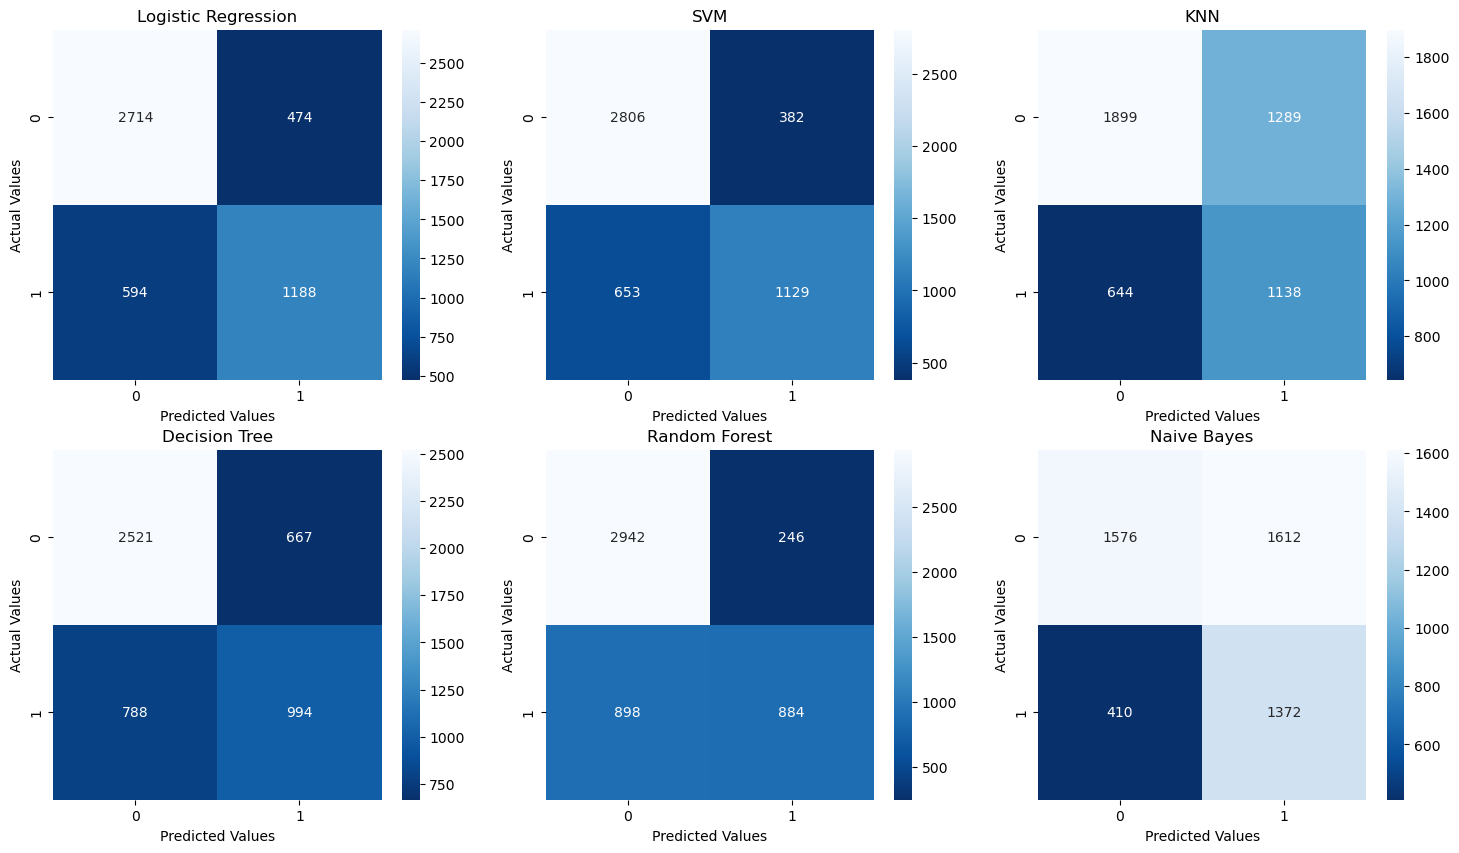

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(f_cm_list)):
    cm = f_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [43]:
FlairML_results = pd.DataFrame({'Model':model_list, 'Accuracy':f_acc_list})
FlairML_results

,Model,Accuracy
0,Logistic Regression,0.785111
1,SVM,0.791751
2,KNN,0.611066
3,Decision Tree,0.707243
4,Random Forest,0.769819
5,Naive Bayes,0.593159


#### Final Results Dataframe

In [44]:
all_results = pd.DataFrame({'Model':model_list, 'Dataset Labels Accuracy': Dataset_acc_list, 'VADER Accuracy': Vader_acc_list, 'TextBlob Accuracy': tb_acc_list, 'Flair Accuracy': f_acc_list})
all_results

,Model,Dataset Labels Accuracy,VADER Accuracy,TextBlob Accuracy,Flair Accuracy
0,Logistic Regression,0.807646,0.803823,0.879276,0.785111
1,SVM,0.788934,0.740443,0.802213,0.791751
2,KNN,0.556338,0.430986,0.526559,0.611066
3,Decision Tree,0.734809,0.703823,0.907243,0.707243
4,Random Forest,0.784507,0.734809,0.841851,0.769819
5,Naive Bayes,0.606036,0.490543,0.445070,0.593159
